Looking into learning functions, let's visualize a really simple function -- where we just keep the values along a matrix diagonal stripe. We'll set up a bunch of random matrixes, and map those through just the diagonals of those matrixes.

In order to see inside the learning process, and what the different learning functions actually do -- we'll inspect what is being learned with some animation. If all works out well, we'll 'learn' a diagonal mapping function!

In [1]:
import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


This is our objective function -- we know what we are looking for, and much like solving an equation in good old algebra, we'll be using machine learning to figure out the answer. We'll take a look at it as an image.

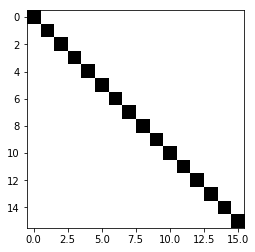

In [2]:
size = (16, 16)
objective = np.zeros(size)
np.fill_diagonal(objective, 1)
plt.imshow(objective, cmap='binary')

Now - a set of random inputs and outputs.

In [3]:
inputs = [np.random.random(size) for i in range(10 * 1024)]
outputs = [input * objective for input in inputs]

Ok -- now let's look at what we've created -- some 'white noise' and then a nice extraction along the diagonal of that noise by multiplying the matrix.

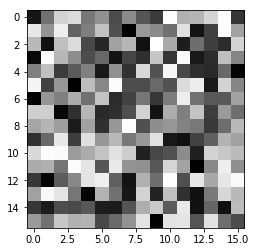

In [4]:
plt.imshow(inputs[0], cmap='binary')

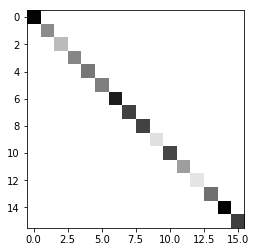

In [5]:
plt.imshow(outputs[0], cmap='binary')

OK -- now we'll set up to learn, starting with a random matrix. This is again white noise, and we'll be using machine learning to adjust the values to get to our nice solid diagonal stripe objective function.

We're setting up an MxNet parameter.

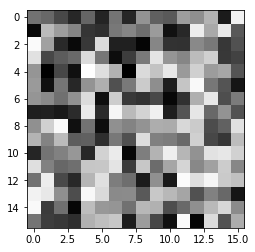

In [6]:
ctx = mx.cpu()
params = gluon.parameter.ParameterDict('_')
learned_diagonal = params.get('learned_diagonal', grad_req='write', shape=size)
params.initialize(ctx=ctx)
plt.imshow(learned_diagonal.data().asnumpy(), cmap='binary')

This is a really simple network - a single multiplication, with a square loss function.

In [7]:
epochs = 10

def net(input):
    return input * learned_diagonal.data()


square_loss = gluon.loss.L2Loss()
optimizer = gluon.Trainer(params, 'sgd', {'learning_rate': 0.01})

for e in range(epochs):
    for i, (input, output) in enumerate(zip(inputs, outputs)):
        input = nd.array(input).as_in_context(ctx)
        output = nd.array(output).as_in_context(ctx)
        with autograd.record():
            predicted = net(input)
            loss = square_loss(predicted, output)
            loss.backward()
        optimizer.step(input.shape[0])
    #plt.imshow(learned_diagonal.data().asnumpy(), cmap='binary')
    #break

    print("Loss: {0}".format(nd.sum(loss).asscalar()), flush=True)


Loss: 0.09845314174890518
Loss: 0.07545284181833267
Loss: 0.05782625824213028
Loss: 0.04431762546300888
Loss: 0.03396492451429367
Loss: 0.02603093534708023
Loss: 0.01995038613677025
Loss: 0.015290269628167152
Loss: 0.011718875728547573
Loss: 0.008981775492429733


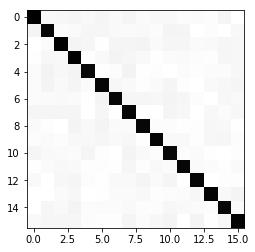

In [8]:
plt.imshow(learned_diagonal.data().asnumpy(), cmap='binary')